## Data Description
#### client_data.csv
* id = client company identifier
* activity_new = category of the company’s activity
* channel_sales = code of the sales channel
* cons_12m = electricity consumption of the past 12 months
*	cons_gas_12m = gas consumption of the past 12 months
*	cons_last_month = electricity consumption of the last month
*	date_activ = date of activation of the contract
*	date_end = registered date of the end of the contract
*	date_modif_prod = date of the last modification of the product
*	date_renewal = date of the next contract renewal
*	forecast_cons_12m = forecasted electricity consumption for next 12 months
*	forecast_cons_year = forecasted electricity consumption for the next calendar year
*	forecast_discount_energy = forecasted value of current discount
*	forecast_meter_rent_12m = forecasted bill of meter rental for the next 2 months
*	forecast_price_energy_off_peak = forecasted energy price for 1st period (off peak)
*	forecast_price_energy_peak = forecasted energy price for 2nd period (peak)
*	forecast_price_pow_off_peak = forecasted power price for 1st period (off peak)
*	has_gas = indicated if client is also a gas client
*	imp_cons = current paid consumption
*	margin_gross_pow_ele = gross margin on power subscription
*	margin_net_pow_ele = net margin on power subscription
*	nb_prod_act = number of active products and services
*	net_margin = total net margin
*	num_years_antig = antiquity of the client (in number of years)
*	origin_up = code of the electricity campaign the customer first subscribed to
*	pow_max = subscribed power
*	churn = has the client churned over the next 3 months

#### price_data.csv
*	id = client company identifier
*	price_date = reference date
*	price_off_peak_var = price of energy for the 1st period (off peak)
*	price_peak_var = price of energy for the 2nd period (peak)
*	price_mid_peak_var = price of energy for the 3rd period (mid peak)
*	price_off_peak_fix = price of power for the 1st period (off peak)
*	price_peak_fix = price of power for the 2nd period (peak)
*	price_mid_peak_fix = price of power for the 3rd period (mid peak)

Assumption) divide a day to 3 ranges and assign different cost for each range: least energy intensive (morning), mid-energy intensive (evening), high-energy intesive (daytime)

In [1]:
# import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Part 1. EDA

Try to figure out what each feature means

In [2]:
df_client = pd.read_csv('client_data.csv')
df_price =pd.read_csv('price_data.csv')

In [3]:
df_client.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,t,0.00,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,f,0.00,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,f,0.00,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,...,f,0.00,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,0
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,...,f,52.32,44.91,44.91,1,47.98,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,19.800,0


In [4]:
df_price.head()

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.0,0.0,44.266931,0.0,0.0
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.0,0.0,44.266931,0.0,0.0


In [5]:
df_client.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              14606 non-null  object 
 1   channel_sales                   14606 non-null  object 
 2   cons_12m                        14606 non-null  int64  
 3   cons_gas_12m                    14606 non-null  int64  
 4   cons_last_month                 14606 non-null  int64  
 5   date_activ                      14606 non-null  object 
 6   date_end                        14606 non-null  object 
 7   date_modif_prod                 14606 non-null  object 
 8   date_renewal                    14606 non-null  object 
 9   forecast_cons_12m               14606 non-null  float64
 10  forecast_cons_year              14606 non-null  int64  
 11  forecast_discount_energy        14606 non-null  float64
 12  forecast_meter_rent_12m         

In [6]:
df_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193002 entries, 0 to 193001
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  193002 non-null  object 
 1   price_date          193002 non-null  object 
 2   price_off_peak_var  193002 non-null  float64
 3   price_peak_var      193002 non-null  float64
 4   price_mid_peak_var  193002 non-null  float64
 5   price_off_peak_fix  193002 non-null  float64
 6   price_peak_fix      193002 non-null  float64
 7   price_mid_peak_fix  193002 non-null  float64
dtypes: float64(6), object(2)
memory usage: 11.8+ MB


In [7]:
df_client.isnull().sum()

id                                0
channel_sales                     0
cons_12m                          0
cons_gas_12m                      0
cons_last_month                   0
date_activ                        0
date_end                          0
date_modif_prod                   0
date_renewal                      0
forecast_cons_12m                 0
forecast_cons_year                0
forecast_discount_energy          0
forecast_meter_rent_12m           0
forecast_price_energy_off_peak    0
forecast_price_energy_peak        0
forecast_price_pow_off_peak       0
has_gas                           0
imp_cons                          0
margin_gross_pow_ele              0
margin_net_pow_ele                0
nb_prod_act                       0
net_margin                        0
num_years_antig                   0
origin_up                         0
pow_max                           0
churn                             0
dtype: int64

In [8]:
df_price.isnull().sum()

id                    0
price_date            0
price_off_peak_var    0
price_peak_var        0
price_mid_peak_var    0
price_off_peak_fix    0
price_peak_fix        0
price_mid_peak_fix    0
dtype: int64

No missing entry

In [9]:
df_client.nunique()

id                                14606
channel_sales                         8
cons_12m                          11065
cons_gas_12m                       2112
cons_last_month                    4751
date_activ                         1796
date_end                            368
date_modif_prod                    2129
date_renewal                        386
forecast_cons_12m                 13993
forecast_cons_year                 4218
forecast_discount_energy             12
forecast_meter_rent_12m            3528
forecast_price_energy_off_peak      516
forecast_price_energy_peak          329
forecast_price_pow_off_peak          41
has_gas                               2
imp_cons                           7752
margin_gross_pow_ele               2391
margin_net_pow_ele                 2391
nb_prod_act                          10
net_margin                        11965
num_years_antig                      13
origin_up                             6
pow_max                             698


In [10]:
df_price.nunique()

id                    16096
price_date               12
price_off_peak_var     1853
price_peak_var         1189
price_mid_peak_var      711
price_off_peak_fix       66
price_peak_fix           31
price_mid_peak_fix       28
dtype: int64

In [11]:
df_price['price_date'].unique()

array(['2015-01-01', '2015-02-01', '2015-03-01', '2015-04-01',
       '2015-05-01', '2015-06-01', '2015-07-01', '2015-08-01',
       '2015-09-01', '2015-10-01', '2015-11-01', '2015-12-01'],
      dtype=object)

The price of electricity/power is deteremined every first day of the month.

Text(1, 1419, 'Yes Churn 9.72%')

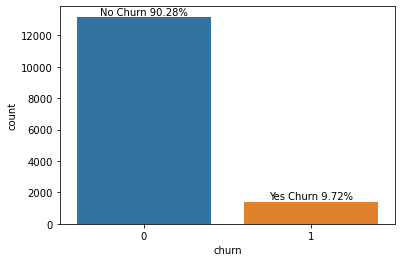

In [12]:
# Churnning percentage churn value 0 -> No churn , value 1 -> Yes churn

no_churn = df_client.value_counts('churn')[0]
yes_churn = df_client.value_counts('churn')[1]
total_churn = len(df_client)

sns.countplot(data=df_client, x='churn', )
plt.text(0,no_churn,f'No Churn {100*no_churn/total_churn:.2f}%',va='bottom',ha='center')
plt.text(1,yes_churn,f'Yes Churn {100*yes_churn/total_churn:.2f}%',va='bottom',ha='center')

## Part 1.1. Check the statistics of Numeric Features.

### Client Data

In [13]:
df_client.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
cons_12m,14606.0,159220.286252,573465.264198,0.0,5674.750000,14115.500000,40763.750000,6.207104e+06
cons_gas_12m,14606.0,28092.375325,162973.059057,0.0,0.000000,0.000000,0.000000,4.154590e+06
cons_last_month,14606.0,16090.269752,64364.196422,0.0,0.000000,792.500000,3383.000000,7.712030e+05
forecast_cons_12m,14606.0,1868.614880,2387.571531,0.0,494.995000,1112.875000,2401.790000,8.290283e+04
forecast_cons_year,14606.0,1399.762906,3247.786255,0.0,0.000000,314.000000,1745.750000,1.753750e+05
forecast_discount_energy,14606.0,0.966726,5.108289,0.0,0.000000,0.000000,0.000000,3.000000e+01
forecast_meter_rent_12m,14606.0,63.086871,66.165783,0.0,16.180000,18.795000,131.030000,5.993100e+02
forecast_price_energy_off_peak,14606.0,0.137283,0.024623,0.0,0.116340,0.143166,0.146348,2.739630e-01
forecast_price_energy_peak,14606.0,0.050491,0.049037,0.0,0.000000,0.084138,0.098837,1.959750e-01
forecast_price_pow_off_peak,14606.0,43.130056,4.485988,0.0,40.606701,44.311378,44.311378,5.926638e+01


### Q1. 
The statistics between "margin_gross_pow_ele" and "margin_net_pow_ele" looks extremely the same. Investigate more about them.
* Gross Margin: (Net sales - COGS)/Net sales; COGS: expenses directly related to creation of product
* Net Margin: (Net Profit - Net expenses) / Net Profit; Profit and expenses not only limited to the product (interest, taxes, operation costs, etc.)

Guess most of their profit/expenses arises from energy related sales and that is why those two are basically the same

In [14]:
df_client[df_client['margin_gross_pow_ele']!=df_client['margin_net_pow_ele']][["margin_gross_pow_ele","margin_net_pow_ele"]]

,margin_gross_pow_ele,margin_net_pow_ele
4876,64.28,57.59
10756,40.88,9.54


#### Only two entries are different. I don't know what does this mean at this point. Should ask someone who knows well about accounting.

#### Given that there are only two entries they have differnt margin_gross and margin_net. It is safe to get rid of one column.

### Q2.
A lot of zero entries in "cons_gas_12m" and "forecast_discount_energy". Latter is making sense if this company did not provide discount. Study more about "cons_gas_12m". Is it related to "has_gas" column?

In [15]:
df_client[df_client['has_gas']=='f']['cons_gas_12m'].value_counts()[0]/df_client[df_client['has_gas']=='f']['cons_gas_12m'].value_counts().sum()

0.9955667084901715

99.6 % are zeros.

In [16]:
df_client[df_client['has_gas']=='t']['cons_gas_12m'].value_counts()[0]/df_client[df_client['has_gas']=='t']['cons_gas_12m'].value_counts().sum()

0.03470388532629196

3.5% are zeros

### Price data

Definitely need more description. What is the difference between price of Energy (_var) vs price of Power (_fix)? Power corresponds to electricity and Energy to gas? Are they supposed to be added up (fixed base + variable)? What do peak, mid_meak, and off_peak mean?

In [17]:
df_price.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
price_off_peak_var,193002.0,0.141027,0.025032,0.0,0.125976,0.146033,0.151635,0.280700
price_peak_var,193002.0,0.054630,0.049924,0.0,0.000000,0.085483,0.101673,0.229788
price_mid_peak_var,193002.0,0.030496,0.036298,0.0,0.000000,0.000000,0.072558,0.114102
price_off_peak_fix,193002.0,43.334477,5.410297,0.0,40.728885,44.266930,44.444710,59.444710
price_peak_fix,193002.0,10.622875,12.841895,0.0,0.000000,0.000000,24.339581,36.490692
price_mid_peak_fix,193002.0,6.409984,7.773592,0.0,0.000000,0.000000,16.226389,17.458221


### Q1. Check if power and energy is something about electricity vs gas (Conclusion: No)
A lot of zero entries again. Check the distribution of each columns.

In [18]:
def get_numerical(df):
    """
    Function that returns the feature with integer or float entries
    Return a list with string entries
    """
    num_cols = []
    for col in df.columns:
        if df[col].dtypes == 'int64' or df[col].dtypes == 'float64':
            num_cols.append(col)
    return num_cols

<Figure size 1000x1000 with 0 Axes>

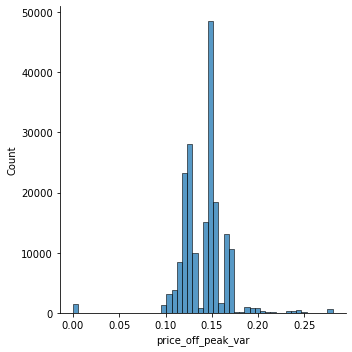

<Figure size 1000x1000 with 0 Axes>

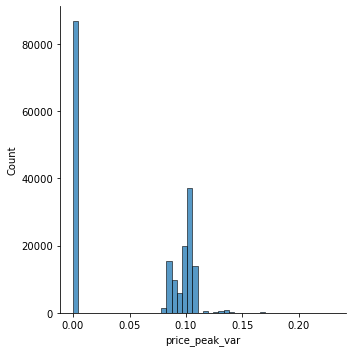

<Figure size 1000x1000 with 0 Axes>

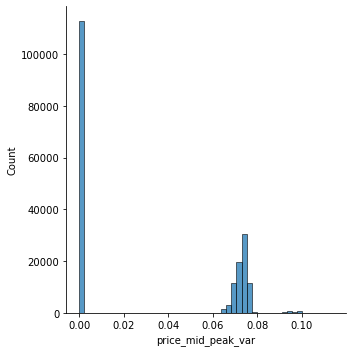

<Figure size 1000x1000 with 0 Axes>

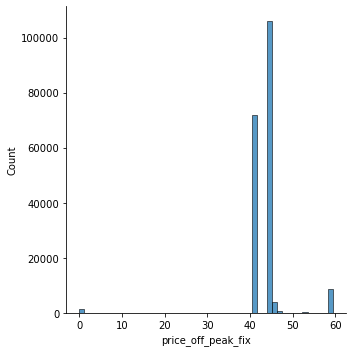

<Figure size 1000x1000 with 0 Axes>

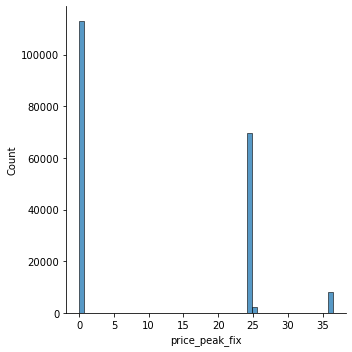

<Figure size 1000x1000 with 0 Axes>

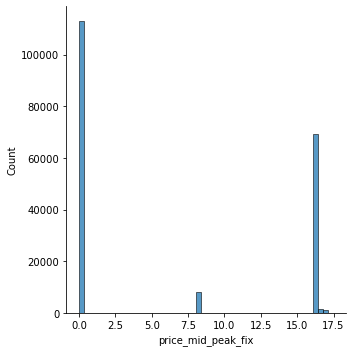

In [19]:
num_cols = get_numerical(df_price)
for col in num_cols:
    plt.figure(figsize=(5,5), dpi=200)
    sns.displot(df_price[col],bins=50)

In [20]:
# Correlated with the gas service?
temp_price = pd.merge(left=df_price, right=df_client[['id','has_gas']], on='id')

temp_price.head()

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix,has_gas
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0,f
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0,f
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0,f
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.0,0.0,44.266931,0.0,0.0,f
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.0,0.0,44.266931,0.0,0.0,f


<Figure size 1000x1000 with 0 Axes>

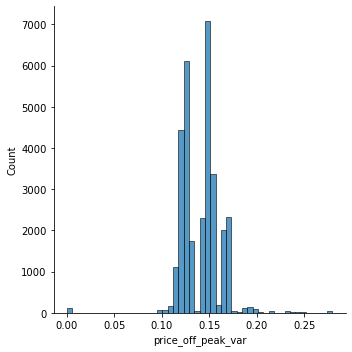

<Figure size 1000x1000 with 0 Axes>

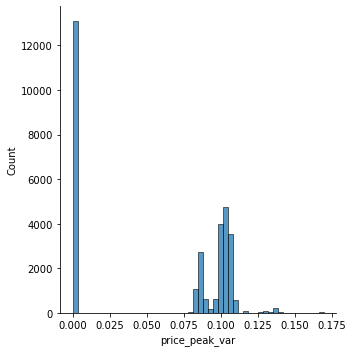

<Figure size 1000x1000 with 0 Axes>

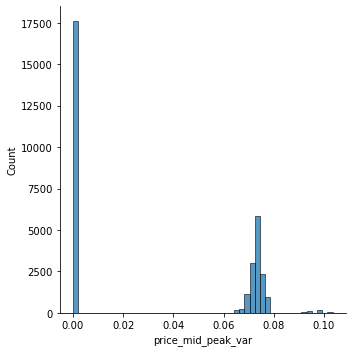

<Figure size 1000x1000 with 0 Axes>

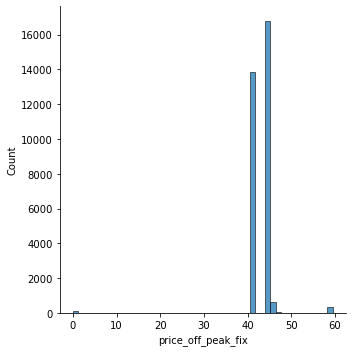

<Figure size 1000x1000 with 0 Axes>

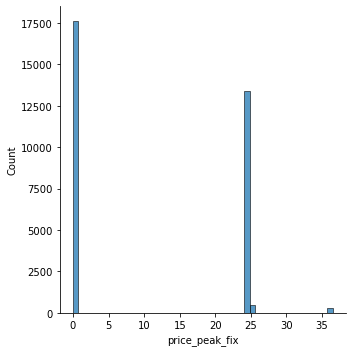

<Figure size 1000x1000 with 0 Axes>

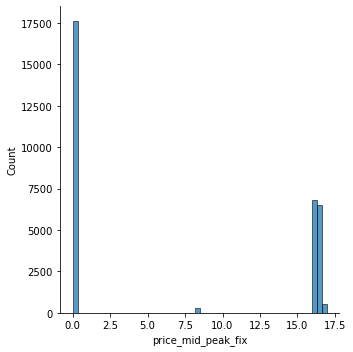

In [21]:
for col in num_cols:
    plt.figure(figsize=(5,5), dpi=200)
    sns.displot(temp_price[temp_price['has_gas']=='t'][col],bins=50)

<Figure size 1000x1000 with 0 Axes>

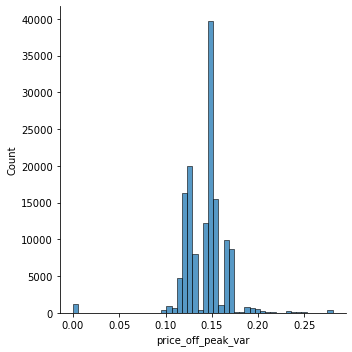

<Figure size 1000x1000 with 0 Axes>

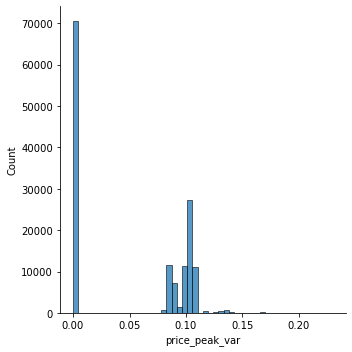

<Figure size 1000x1000 with 0 Axes>

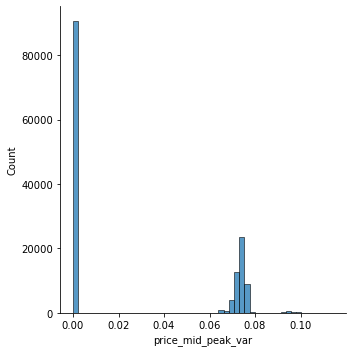

<Figure size 1000x1000 with 0 Axes>

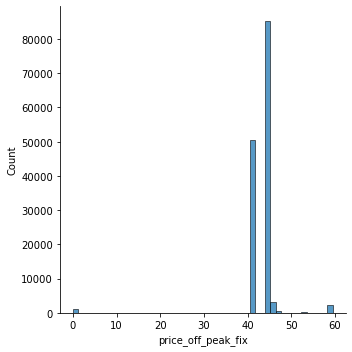

<Figure size 1000x1000 with 0 Axes>

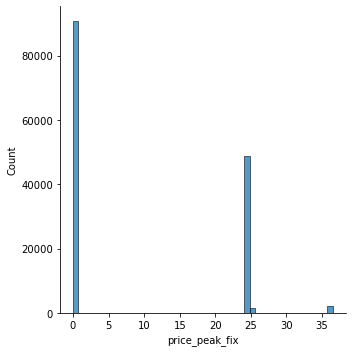

<Figure size 1000x1000 with 0 Axes>

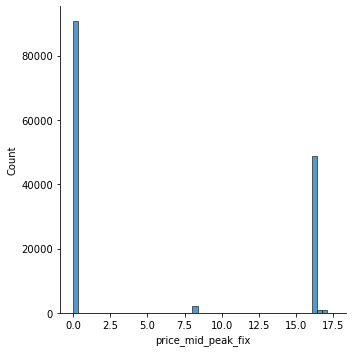

In [22]:
for col in num_cols:
    plt.figure(figsize=(5,5), dpi=200)
    sns.displot(temp_price[temp_price['has_gas']=='f'][col],bins=50)

No clear relation between "has_gas" vs 0 entries.

Clients are not just buying that category. (price_peak_var, price_mid_peak_var, price_peak_fix, price_mid_peak_fix)

### Q2 Should _fix and _var be added up?
Cannot have clear answer at this point. Let's just use mean value for each category as price feature.
The price of the latest month can also be relevant to the churn status.

### Price defined by Mean of each category


In [23]:
# mean of each category
temp1 = df_price.groupby(by='id', as_index=False).mean()
temp1.head()

,id,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,0002203ffbb812588b632b9e628cc38d,0.124338,0.103794,0.073160,40.701732,24.421038,16.280694
1,0004351ebdd665e6ee664792efc4fd13,0.146426,0.000000,0.000000,44.385450,0.000000,0.000000
2,0010bcc39e42b3c2131ed2ce55246e3c,0.181558,0.000000,0.000000,45.319710,0.000000,0.000000
3,0010ee3855fdea87602a5b7aba8e42de,0.118757,0.098292,0.069032,40.647427,24.388455,16.258971
4,00114d74e963e47177db89bc70108537,0.147926,0.000000,0.000000,44.266930,0.000000,0.000000


In [24]:
# Merge everything together in a single dataframe
df = pd.merge(df_client, temp1, on='id')
df.head(10)

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,num_years_antig,origin_up,pow_max,churn,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1,0.124787,0.100749,0.066530,40.942265,22.352010,14.901340
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0,0.149609,0.007124,0.000000,44.311375,0.000000,0.000000
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0,0.170512,0.088421,0.000000,44.385450,0.000000,0.000000
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,...,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,0,0.151210,0.000000,0.000000,44.400265,0.000000,0.000000
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,...,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,19.800,0,0.124174,0.103638,0.072865,40.688156,24.412893,16.275263
5,1aa498825382410b098937d65c4ec26d,usilxuppasemubllopkaafesmlibmsdf,8302,0,1998,2011-12-09,2016-12-09,2015-11-01,2015-12-10,796.94,...,4,lxidpiddsbxsbosboudacockeimpuepw,13.200,1,0.168953,0.087632,0.000000,44.266930,0.000000,0.000000
6,7ab4bf4878d8f7661dfc20e9b8e18011,foosdfpfkusacimwkcsosbicdxkicaua,45097,0,0,2011-12-02,2016-12-02,2011-12-02,2015-12-03,8069.28,...,4,lxidpiddsbxsbosboudacockeimpuepw,15.000,1,0.166061,0.084744,0.000000,44.266930,0.000000,0.000000
7,01495c955be7ec5e7f3203406785aae0,foosdfpfkusacimwkcsosbicdxkicaua,29552,0,1260,2010-04-21,2016-04-21,2010-04-21,2015-04-22,864.73,...,6,lxidpiddsbxsbosboudacockeimpuepw,26.400,0,0.122816,0.102501,0.073536,40.674580,24.404747,16.269833
8,f53a254b1115634330c12c7fdbf7958a,usilxuppasemubllopkaafesmlibmsdf,2962,0,0,2011-09-23,2016-09-23,2011-09-23,2015-09-25,444.38,...,4,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,0,0.149682,0.000000,0.000000,44.311375,0.000000,0.000000
9,10c1b2f97a2d2a6f10299dc213d1a370,lmkebamcaaclubfxadlmueccxoimlema,26064,0,2188,2010-05-04,2016-05-04,2015-04-29,2015-05-05,2738.10,...,6,lxidpiddsbxsbosboudacockeimpuepw,31.500,0,0.123379,0.102952,0.073786,40.728885,24.437330,16.291555


## Part 2. Check if the churn is price-sensitive thing (According to the customer's demand)

Take 'churn' and any price related features and check correlations. Compare it with other features

In [25]:
df.columns

Index(['id', 'channel_sales', 'cons_12m', 'cons_gas_12m', 'cons_last_month',
       'date_activ', 'date_end', 'date_modif_prod', 'date_renewal',
       'forecast_cons_12m', 'forecast_cons_year', 'forecast_discount_energy',
       'forecast_meter_rent_12m', 'forecast_price_energy_off_peak',
       'forecast_price_energy_peak', 'forecast_price_pow_off_peak', 'has_gas',
       'imp_cons', 'margin_gross_pow_ele', 'margin_net_pow_ele', 'nb_prod_act',
       'net_margin', 'num_years_antig', 'origin_up', 'pow_max', 'churn',
       'price_off_peak_var', 'price_peak_var', 'price_mid_peak_var',
       'price_off_peak_fix', 'price_peak_fix', 'price_mid_peak_fix'],
      dtype='object')

### Part 2.1. Overall correlation between price vs churn: Higher peak, mid_peak-> weak positive correlation to the  churn state

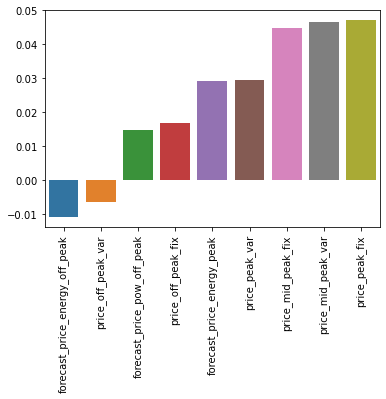

In [26]:
cols = ['churn']
temp = df[df['price_peak_fix'].notnull()]

for col in df.columns:
    if "price" in col:
        cols.append(col)

sns.barplot(x=temp[cols].corr()['churn'].sort_values().iloc[:-1].index,
            y= temp[cols].corr()['churn'].sort_values().iloc[:-1].values)
plt.xticks(rotation=90);

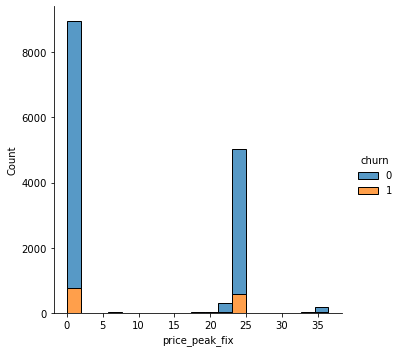

In [27]:
sns.displot(data=df, x='price_peak_fix', hue='churn', multiple='stack')

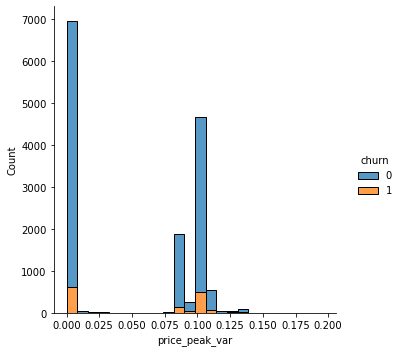

In [28]:
sns.displot(data=df, x='price_peak_var', hue='churn', multiple='stack')

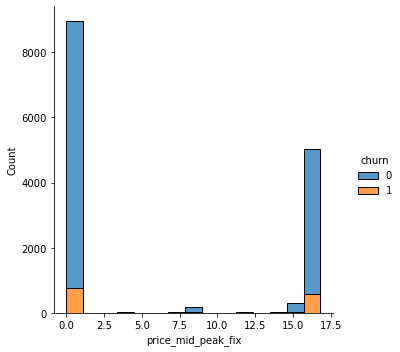

In [29]:
sns.displot(data=df, x='price_mid_peak_fix', hue='churn', multiple='stack')

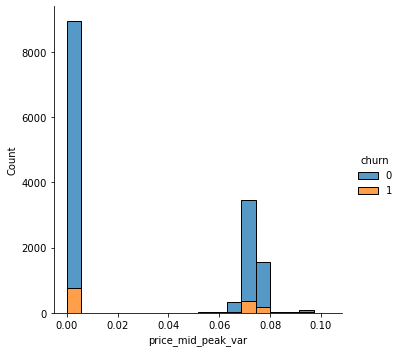

In [30]:
sns.displot(data=df, x='price_mid_peak_var', hue='churn', multiple='stack')

There is no visual evidence of difference in price distribution between churn vs no churn.

### Part 2.2. Consumption vs churn: High energy consumption in last 12 months -> no chrun!
* It looks more correlated from the data visualization
* Price has no huge impact on energy consumption

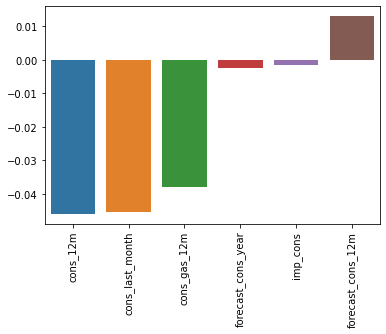

In [31]:
cols = ['churn']
temp = df[df['price_peak_fix'].notnull()]

for col in df.columns:
    if "cons" in col:
        cols.append(col)

sns.barplot(x=temp[cols].corr()['churn'].sort_values().iloc[:-1].index,
            y= temp[cols].corr()['churn'].sort_values().iloc[:-1].values)
plt.xticks(rotation=90);

Text(0.5, 1.0, 'Energy consumption vs Churn')

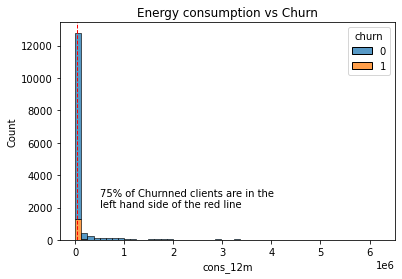

In [32]:
sns.histplot(data=df, x='cons_12m', hue='churn',bins=50, multiple='stack')
plt.axvline(df[df['churn']==1]['cons_12m'].describe()['75%'],0,1, color='r', linestyle='--',linewidth=1)
plt.text(0.5e6,2000,'75% of Churnned clients are in the \nleft hand side of the red line',ha='left')
plt.title('Energy consumption vs Churn')

In [33]:
df.corr()['cons_12m'].sort_values().iloc[:-1]

churn                            -0.045968
forecast_discount_energy         -0.043282
forecast_price_pow_off_peak      -0.026566
price_off_peak_fix               -0.013744
margin_gross_pow_ele             -0.011926
margin_net_pow_ele               -0.011905
forecast_price_energy_off_peak   -0.007748
num_years_antig                  -0.003565
price_off_peak_var                0.000694
price_mid_peak_var                0.050555
price_peak_fix                    0.051751
price_mid_peak_fix                0.055081
forecast_meter_rent_12m           0.065268
pow_max                           0.082889
net_margin                        0.133614
price_peak_var                    0.142933
forecast_price_energy_peak        0.145908
nb_prod_act                       0.154251
imp_cons                          0.159711
forecast_cons_year                0.167093
forecast_cons_12m                 0.193947
cons_gas_12m                      0.488474
cons_last_month                   0.968212
Name: cons_

### Part 2.3. Tenure vs Churn: 75% of Churnned clients are within 6 years.

<AxesSubplot:xlabel='num_years_antig', ylabel='Count'>

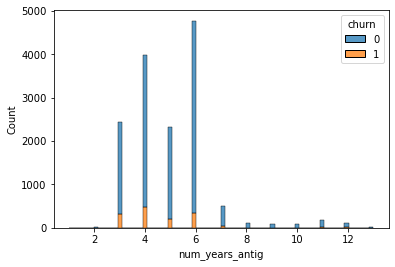

In [34]:
sns.histplot(data=df, x='num_years_antig', hue='churn', multiple='stack')

In [35]:
# Statistics of churrned client
df[df['churn']==1]['num_years_antig'].describe()

count    1419.000000
mean        4.633545
std         1.531853
min         2.000000
25%         4.000000
50%         4.000000
75%         6.000000
max        13.000000
Name: num_years_antig, dtype: float64

## Part 3. Categorical Features

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14606 entries, 0 to 14605
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              14606 non-null  object 
 1   channel_sales                   14606 non-null  object 
 2   cons_12m                        14606 non-null  int64  
 3   cons_gas_12m                    14606 non-null  int64  
 4   cons_last_month                 14606 non-null  int64  
 5   date_activ                      14606 non-null  object 
 6   date_end                        14606 non-null  object 
 7   date_modif_prod                 14606 non-null  object 
 8   date_renewal                    14606 non-null  object 
 9   forecast_cons_12m               14606 non-null  float64
 10  forecast_cons_year              14606 non-null  int64  
 11  forecast_discount_energy        14606 non-null  float64
 12  forecast_meter_rent_12m         

In [37]:
def get_categorical(df):
    cols = []
    for col in df.columns:
        if df[col].dtype == 'object':
            cols.append(col)
    return cols

In [38]:
cols = get_categorical(df)
print(cols)

['id', 'channel_sales', 'date_activ', 'date_end', 'date_modif_prod', 'date_renewal', 'has_gas', 'origin_up']


'id' , 'has_gas' , 'origin_up' are the real categorical features.

Remove id

In [39]:
df_cat=df[['id','has_gas','origin_up','churn']]

In [40]:
df_cat.nunique()

id           14606
has_gas          2
origin_up        6
churn            2
dtype: int64

In [41]:
df_cat['origin_up'].unique()

array(['lxidpiddsbxsbosboudacockeimpuepw',
       'kamkkxfxxuwbdslkwifmmcsiusiuosws',
       'ldkssxwpmemidmecebumciepifcamkci', 'MISSING',
       'usapbepcfoloekilkwsdiboslwaxobdp',
       'ewxeelcelemmiwuafmddpobolfuxioce'], dtype=object)

Look at "MISSING": 4% of the whole data

In [42]:
len(df_cat[df_cat['origin_up']=='MISSING'])/len(df_cat)

0.004381760920169793

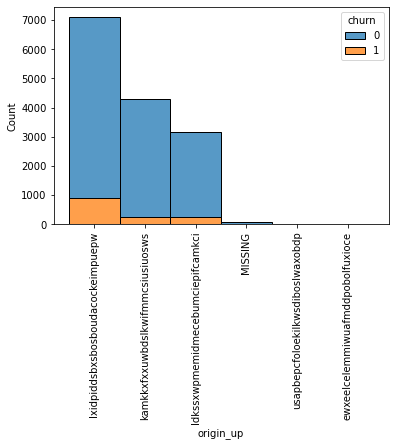

In [43]:
sns.histplot(data=df_cat, x='origin_up', hue='churn', multiple = "stack")
plt.xticks(rotation=90);

## Conclusion
* Electricity consumption is strongly related to the churn
* Peak and midpeak Prices are correlated to the churn state, but number of service years and consumptions are also as strongly related.
* Not sure if 20% discount tactics will work at this point
* Focusing on a strategy to induce new energy-intensive customer will be more effective.

In [44]:
df_num = df.select_dtypes(include= np.number)

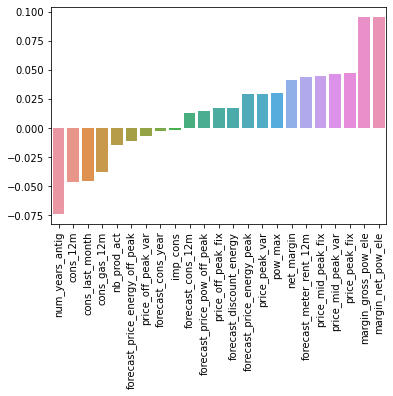

In [45]:
sns.barplot(x=df_num.corr()['churn'].sort_values().iloc[:-1].index, y=df_num.corr()['churn'].sort_values().iloc[:-1].values)
plt.xticks(rotation=90);

In [46]:
df.to_csv('clean_data_after_eda.csv',index_label=False)